In [1]:
import numpy as np
import scipy as sp

np.random.seed(123)

class Neural_Network:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5),(self.inodes,self.hnodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes,self.onodes))
        self.lr = learningrate
        self.activation_function = lambda x: sp.special.expit(x)
        pass
    def train(self,inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2)
        targets = np.array(targets_list, ndmin=2)
        
        hidden_inputs = np.dot(inputs,self.wih)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(hidden_outputs, self.who)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(output_errors, self.who.T)
        
        self.who += self.lr * np.dot(np.transpose(hidden_outputs), (output_errors * final_outputs *(1.0 - final_outputs)))
        self.wih += self.lr * np.dot(np.transpose(inputs),(hidden_errors * hidden_outputs *(1.0 - hidden_outputs)))
        pass
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2)
        hidden_inputs = np.dot(inputs,self.wih)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(hidden_outputs, self.who)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
picture, label = mnist["data"], mnist["target"]
label[0:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs = scaler.fit_transform(picture.astype(np.float64))
print(inputs[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [5]:
shuffle_index = np.random.permutation(70000)
inputs, target = inputs[shuffle_index], label[shuffle_index]
inputs_train, inputs_test, target_train, target_test = inputs[:60000], inputs[60000:], target[:60000], target[60000:]

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', sparse=False)
target_reshaped = target_train.reshape(-1,1)
target_train = encoder.fit_transform(target_reshaped)
target_train[0:4]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [6]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

n = Neural_Network(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [7]:
scorecard = []
i = 0
for record in inputs_train:
    n.train(record, target_train[i])
    i = i+1

In [39]:
i=0
for record in inputs_test:
    outputs = n.query(record)
    lab = np.argmax(outputs)
    if(lab==int(target_test[i])):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
    i = i+1

scorecard_array = np.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)


performance =  0.9555


In [8]:
target_reshaped = target_test.reshape(-1,1)
target_test = encoder.fit_transform(target_reshaped)

i = 0
for record in inputs_test:
    n.train(record, target_test[i])
    i = i+1



In [9]:
import glob
import imageio as ii
our_own_dataset = []

for image_file_name in glob.glob('image?.png'):
    labeling = int(image_file_name[-5:-4])
    print("loading...",image_file_name)
    img_array = ii.imread(image_file_name, as_gray=True)
    img_data = 255.0-img_array.reshape(784,1)
    
    img_data = scaler.fit_transform(img_data.astype(np.float64))
    
    record = np.append(labeling,img_data)
    our_own_dataset.append(record)

loading... image0.png
loading... image1.png
loading... image2.png
loading... image3.png
loading... image4.png
loading... image5.png
loading... image6.png
loading... image7.png
loading... image8.png
loading... image9.png


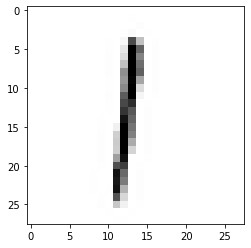

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
item = 0
plt.imshow(our_own_dataset[1][1:].reshape(28,28),cmap='Greys',interpolation='None')


In [11]:
x = np.arange(0,10)
for i in x:

    correct_label = our_own_dataset[i][0]
    inputing = our_own_dataset[i][1:]
    outputing = n.query(inputing)
    label = np.argmax(outputing)
    print("network says",label)
    if(label==int(correct_label)):
        print("match!")
    else:
        print("no match!")
    print(int(correct_label))

network says 0
match!
0
network says 5
no match!
1
network says 2
match!
2
network says 3
match!
3
network says 4
match!
4
network says 5
match!
5
network says 6
match!
6
network says 2
no match!
7
network says 8
match!
8
network says 5
no match!
9


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])